<a href="https://colab.research.google.com/github/xxl5455/DS340/blob/main/Data_Preposeccing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
# loading the csv data to a Pandas DataFrame
data1904 = pd.read_csv('/content/drive/My Drive/DS340w/JC-201904-citibike-tripdata.csv')
data1905 = pd.read_csv('/content/drive/My Drive/DS340w/JC-201905-citibike-tripdata.csv')
data1906 = pd.read_csv('/content/drive/My Drive/DS340w/JC-201906-citibike-tripdata.csv')
data2004 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202004-citibike-tripdata.csv')
data2005 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202005-citibike-tripdata.csv')
data2006 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202006-citibike-tripdata.csv')
data2104 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202104-citibike-tripdata.csv')
data2105 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202105-citibike-tripdata.csv')
data2106 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202106-citibike-tripdata.csv')
data2204 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202204-citibike-tripdata.csv')
data2205 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202205-citibike-tripdata.csv')
data2206 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202206-citibike-tripdata.csv')
data2304 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202304-citibike-tripdata.csv')
data2305 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202305-citibike-tripdata.csv')
data2306 = pd.read_csv('/content/drive/My Drive/DS340w/JC-202306-citibike-tripdata.csv')

In [94]:
select_columns = ['starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'usertype', 'tripduration' ]
data1904 = data1904[select_columns]
data1905 = data1905[select_columns]
data1906 = data1906[select_columns]
data2004 = data2004[select_columns]
data2005 = data2005[select_columns]
data2006 = data2006[select_columns]

# Concatenate the selected data from all DataFrames into one
combined_df = pd.concat([data1904, data1905, data1906, data2004, data2005, data2006], ignore_index=True)

dataframes = [data2104, data2105, data2106, data2204, data2205, data2206, data2304, data2305, data2306]
columns_to_delete = ['ride_id', 'rideable_type']

# Iterate over the list of DataFrames and delete the column
for df in dataframes:
    df.drop(columns=columns_to_delete, inplace=True)

combined_df2 = pd.concat([data2104, data2105, data2106, data2204, data2205, data2206, data2304, data2305, data2306], ignore_index=True)
# Convert the start_time and end_time columns to datetime
combined_df2['started_at'] = pd.to_datetime(combined_df2['started_at'])
combined_df2['ended_at'] = pd.to_datetime(combined_df2['ended_at'])
combined_df2['duration in day'] = (combined_df2['ended_at'] - combined_df2['started_at'])

# Convert the duration to seconds
combined_df2['duration'] = combined_df2['duration in day'].dt.total_seconds()
del combined_df2['duration in day']

In [95]:
# Unify the column names of datasets
combined_df = combined_df.rename(columns={'starttime': 'started_at', 'stoptime': 'ended_at',
                                          'start station id':'start_station_id', 'start station name':'start_station_name',
                                          'start station latitude': 'start_lat', 'start station longitude': 'start_lng',
                                          'end station id':'end_station_id', 'end station name':'end_station_name',
                                          'end station latitude': 'end_lat', 'end station longitude': 'end_lng',
                                          'usertype': 'member_casual', 'tripduration': 'duration'})

In [96]:
# Unify the column types of datasets
# Convert datetime columns in combined_df to datetime
combined_df['started_at'] = pd.to_datetime(combined_df['started_at'])
combined_df['ended_at'] = pd.to_datetime(combined_df['ended_at'])

# Convert station ID columns in both DataFrames to object(string)
combined_df['start_station_id'] = combined_df['start_station_id'].astype(str)
combined_df['end_station_id'] = combined_df['end_station_id'].astype(str)
combined_df2['start_station_id'] = combined_df2['start_station_id'].astype(str)
combined_df2['end_station_id'] = combined_df2['end_station_id'].astype(str)


# Convert duration columns in combined_df2 to int
combined_df2['duration'] = combined_df2['duration'].astype(int)

In [97]:
# After aligning data types, you can perform the join
bike = pd.merge(combined_df, combined_df2, on=['started_at', 'ended_at', 'start_station_name', 'start_station_id',
                                               'end_station_name', 'end_station_id', 'start_lat', 'start_lng',
                                               'end_lat', 'end_lng', 'member_casual', 'duration'], how='outer')
bike

,started_at,ended_at,start_station_id,start_station_name,start_lat,start_lng,end_station_id,end_station_name,end_lat,end_lng,member_casual,duration
0,2019-04-01 07:48:04.754,2019-04-01 07:49:52.359,3183,Exchange Place,40.716247,-74.033459,3184,Paulus Hook,40.714145,-74.033552,Subscriber,107
1,2019-04-01 12:41:09.654,2019-04-01 12:49:23.029,3183,Exchange Place,40.716247,-74.033459,3187,Warren St,40.721124,-74.038051,Customer,493
2,2019-04-01 14:27:07.940,2019-04-01 14:35:40.937,3183,Exchange Place,40.716247,-74.033459,3202,Newport PATH,40.727224,-74.033759,Subscriber,512
3,2019-04-01 15:07:38.151,2019-04-01 15:10:54.626,3183,Exchange Place,40.716247,-74.033459,3214,Essex Light Rail,40.712774,-74.036486,Subscriber,196
4,2019-04-01 16:19:24.694,2019-04-01 16:27:08.645,3183,Exchange Place,40.716247,-74.033459,3273,Manila & 1st,40.721651,-74.042884,Subscriber,463
...,...,...,...,...,...,...,...,...,...,...,...,...
840163,2023-06-30 19:41:00.000,2023-06-30 23:07:31.000,JC098,Washington St,40.724294,-74.035483,JC008,Newport Pkwy,40.728745,-74.032108,casual,12391
840164,2023-06-20 18:55:02.000,2023-06-20 19:01:47.000,JC098,Washington St,40.724273,-74.035498,HB401,Southwest Park - Jackson St & Observer Hwy,40.737551,-74.041664,member,405
840165,2023-06-22 19:24:22.000,2023-06-22 19:30:03.000,HB305,9 St HBLR - Jackson St & 8 St,40.747907,-74.038412,HB505,Willow Ave & 12 St,40.751867,-74.030377,casual,341
840166,2023-06-30 13:34:09.000,2023-06-30 13:38:34.000,HB305,9 St HBLR - Jackson St & 8 St,40.747971,-74.038413,HB505,Willow Ave & 12 St,40.751867,-74.030377,casual,265


In [98]:
bike.isnull().sum()

started_at               0
ended_at                 0
start_station_id         0
start_station_name      58
start_lat                0
start_lng                0
end_station_id           0
end_station_name      1885
end_lat               1262
end_lng               1262
member_casual            0
duration                 0
dtype: int64

In [99]:
bike = bike.dropna()
#checking nul values in each columns
bike.isnull().sum()
#Count unique values each columns
bike.nunique()

started_at            820167
ended_at              820830
start_station_id         282
start_station_name       228
start_lat              48982
start_lng              49829
end_station_id           507
end_station_name         430
end_lat                  516
end_lng                  516
member_casual              4
duration               12972
dtype: int64

In [100]:
# Remove extreme outliers, trip duration less than 1 minutes and more than 12 hours
bike = bike[(bike['duration'] <= 3600*12) & (bike['duration'] > 60)]

count    823922.000000
mean        884.795851
std        1565.513640
min          61.000000
25%         285.000000
50%         468.000000
75%         879.000000
max       43186.000000
Name: duration, dtype: float64


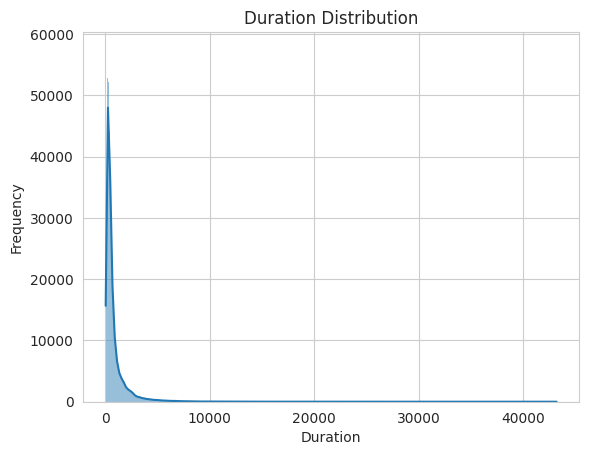

In [102]:
print(bike['duration'].describe())
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create the histogram
sns.histplot(bike['duration'], bins=1000, kde=True)  # 'kde' adds a Kernel Density Estimate line
plt.title('Duration Distribution')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()
